### Schemdraw Test Cases
In addition to running the documentation/gallery examples, this notebook provides some extra test cases to verify functionality.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib as mpl

import SchemDraw as schem
from SchemDraw import elements as e
from SchemDraw import logic as l
print(schem.__version__)

0.4.0


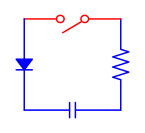

In [3]:
# Test directions. Should form square. Blue as default color.
d = schem.Drawing(color='blue', lw=1.5)
d.add( e.CAP, d='right' )
d.add( e.RES, d='up' )
d.add( e.SWITCH_SPST, d='left', color='red' )
d.add( e.DIODE_F, d='down' )
d.draw()


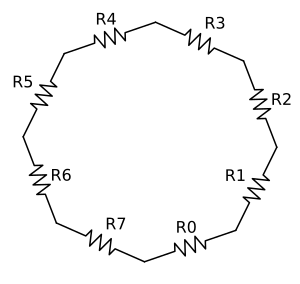

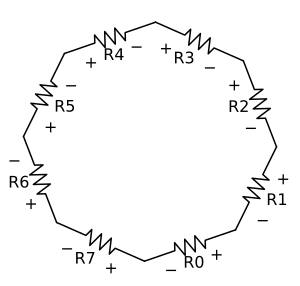

In [4]:
# Test label positioning & rotations/theta
d = schem.Drawing()
for i in range(8):
    d.add(e.RES, label='R%d'%i, theta=45*i+20 )
d.draw()

d = schem.Drawing()
for i in range(8):
    d.add(e.RES, botlabel=['$-$','R%d'%i,'+'], theta=45*i+20 )  # put the - sign in LaTeX/math mode so it's not a hyphen.
d.draw()


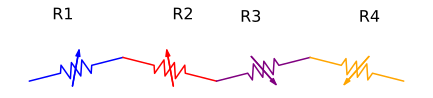

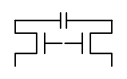

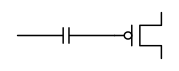

In [5]:
# Reverse and Flip, Colors
d = schem.Drawing()
d.add(e.RES_VAR, label='R1', theta=15, reverse=False, color='blue', lblofst=1. )
d.add(e.RES_VAR, label='R2', theta=-15, reverse=True, color='red', lblofst=1. )
d.add(e.RES_VAR, label='R3', theta=15, flip=True, color='purple', lblofst=1. )
d.add(e.RES_VAR, label='R4', theta=-15, flip=True, reverse=True, color='orange', lblofst=1. )
d.draw()

# Reverse/flip 3-terminal
d = schem.Drawing()
f = d.add(e.NFET, reverse=False )
d.add(e.CAP, xy=f.drain )
f = d.add(e.NFET, reverse=True )
d.draw()
d = schem.Drawing(inches_per_unit=.5)
c = d.add( e.CAP )
f = d.add( e.PFET, anchor='gate', reverse=True )
d.draw()
d.save('fettest.svg')
d.save('fettest.eps')
d.save('fettest.png')

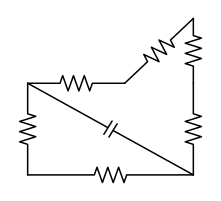

In [6]:
# to, tox, toy, endpts
# Should be closed loop with cap along diagonal.
d = schem.Drawing()
R1 = d.add( e.RES, )
R2 = d.add( e.RES, theta=45 )
R3 = d.add( e.RES, d='down', toy=R1.end )
R4 = d.add( e.RES, d='down' )
R5 = d.add( e.RES, d='left', tox = R1.start )
R6 = d.add( e.RES, endpts=[R5.end,R1.start])
C  = d.add( e.CAP, to=R4.end )
d.draw()

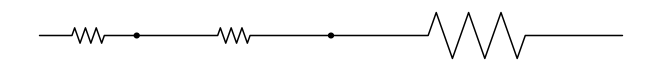

In [7]:
# length, xoom
d = schem.Drawing()
d.add( e.RES )
d.add( e.DOT )
d.add( e.RES, l=6 )
d.add( e.DOT )
d.add( e.RES, zoom=3 )
d.draw()

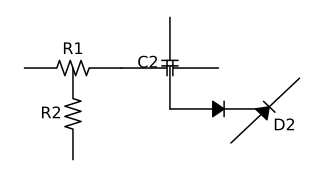

In [8]:
# Anchor Test
# R2 should start at the center of R1
# Capacitors have center at same point
# Tilted diode is centered on end of straight diode

d = schem.Drawing(inches_per_unit=.5)
R1 = d.add( e.RES, label='R1')
R2 = d.add( e.RES, d='down', xy=R1.center, label='R2')

C1 = d.add( e.CAP, d='right', xy=R1.end)
C2 = d.add( e.CAP, d='down', anchor='center', xy=C1.center, label='C2')

D1 = d.add( e.DIODE_F, d='right')
D2 = d.add( e.DIODE_F, theta=45, anchor='center', xy=D1.end, botlabel='D2')

d.draw()

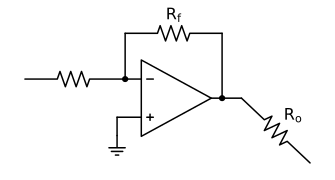

In [9]:
# Opamp, opamp anchor points
d = schem.Drawing(inches_per_unit=.5)
op = d.add( e.OPAMP )
d.add( e.LINE, d='left', xy=op.in1, l=d.unit/6 )
d.add( e.DOT )
d.add( e.LINE, d='up', l=d.unit/2 )
Rf = d.add( e.RES,  d='right', l=d.unit*1, label='$R_f$' )

ee = d.add( e.LINE, d='down', toy=op.out )
ll = d.add( e.LINE, d='left', tox=op.out )
d.add( e.DOT, xy=ll.start )
out = d.add( e.LINE, d='right', l=d.unit/5 )

Rf = d.add( e.RES, theta=-45, label='$R_o$' )
Rin = d.add( e.RES, d='left', xy=op.in1-[d.unit/5,0])
d.add( e.LINE, d='left', xy=op.in2, l=d.unit/4 )
d.add( e.LINE, d='down', l=d.unit/5 )
d.add( e.GND )
d.draw()

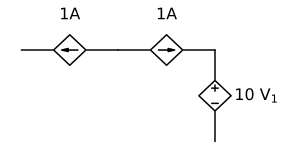

In [10]:
# Dependent sources
d = schem.Drawing()
v = d.add( e.SOURCE_CONT_V, botlabel='10 $V_1$' )
i = d.add( e.SOURCE_CONT_I, d='left', toplabel='1A', lblofst=.4 )
i2 = d.add( e.SOURCE_CONT_I, d='left', reverse=True, toplabel='1A', lblofst=.4)
d.draw()


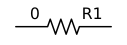

In [11]:
# Label location, adding labels after adding element
d = schem.Drawing()
R = d.add( e.RES, lblloc='center', lblofst=[.9,.4], label='R1' )
R.add_label( '0', loc='center', ofst=[-.9,.4] )
d.draw()

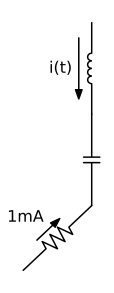

In [12]:
# Test current label arrows, reversing, length
# The 1mA current arrow should be same length as resistor, pointing up/right
# The i(t) arrow should point down (reverse of inductor 'up' direction)
d = schem.Drawing()
theta = 45
R = d.add( e.RES, theta=theta)
d.labelI( R, label='1mA', top=True, arrowlen=1 )
d.add( e.CAP, d='up')
I1 = d.add( e.INDUCTOR )
d.labelI( I1, label='$i(t)$', top=True, reverse=True )
d.draw()


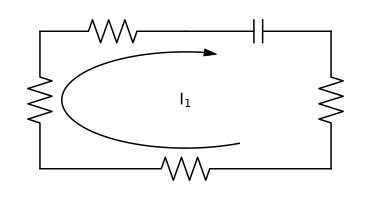

In [13]:
# Test loop current label
d = schem.Drawing(inches_per_unit=.75)
R1 = d.add( e.RES )
C = d.add( e.CAP )
R2 = d.add( e.RES, d='down')
R3 = d.add( e.RES, d='left', tox=R1.start)
R4 = d.add( e.RES, d='up' )
L = d.loopI( [R1, R2, R3, R4], d='cw', label='$I_1$', theta1=70, theta2=-40 )
d.draw(showframe=False)


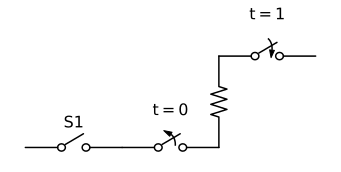

In [14]:
# Switches
d = schem.Drawing()
d.add( e.SWITCH_SPST, label='S1')
d.add( e.SWITCH_SPST_OPEN, label='$t=0$')
d.add( e.RES,d='up')
d.add( e.SWITCH_SPST_CLOSE, label='$t=1$', d='right')
d.draw()

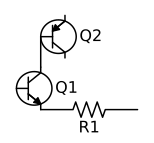

In [15]:
# BJT's
d = schem.Drawing()
Q1 = d.add( e.BJT_NPN_C, rgtlabel='Q1')
d.add( e.LINE, d='up', l=1)
Q2 = d.add( e.BJT_PNP_C, d='right', rgtlabel='Q2')

d.add( e.RES, xy=Q1.emitter, botlabel='R1')
d.draw()


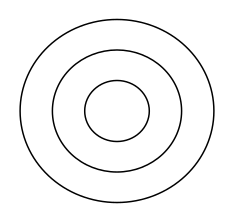

In [16]:
## Testing nested elements - three circles
T1 = { 'shapes' : [{'shape':'circle','center':[0,0],'radius':1}] }
T2 = {'base':T1,
      'shapes' : [{'shape':'circle','center':[0,0],'radius':2}]
      }
T3 = {'base':T2,
      'shapes' : [{'shape':'circle','center':[0,0],'radius':3}]
      }

d = schem.Drawing()
d.add(T3)
d.draw()

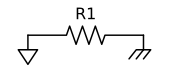

In [17]:
# Test grounds
d = schem.Drawing(inches_per_unit=.6)
d.add( e.GND_SIG )
d.add( e.RES, label='R1')
d.add( e.GND_CHASSIS )
d.draw()

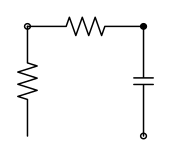

In [18]:
# Open and closed dots
d = schem.Drawing(inches_per_unit=.6)
d.add( e.RES, d='up')
d.add( e.DOT_OPEN )
d.add( e.RES, d='right')
d.add( e.DOT )
d.add( e.CAP,d='down')
d.add( e.DOT_OPEN )

d.draw()

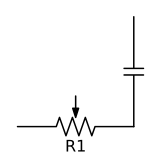

In [19]:
# pot
d = schem.Drawing(inches_per_unit=.6)
d.add(e.POT, label='R1')
d.add( e.CAP,d='up')
d.draw()

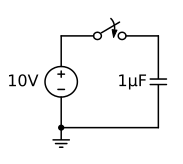

In [20]:
# Looks like a homework problem
d = schem.Drawing()
G = d.add( e.GND )
d.add( e.SOURCE_V, d='up', toplabel='10V', lblofst=.2)
S1 = d.add( e.SWITCH_SPST_CLOSE, d='right' )
d.add( e.CAP, d='down', label='1$\mu$F' )
d.add( e.LINE, d='left', tox=G.start )
d.add( e.DOT )
d.draw(showframe=False)


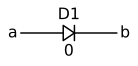

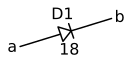

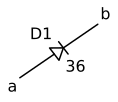

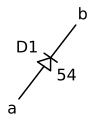

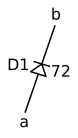

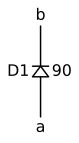

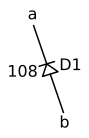

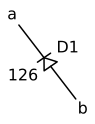

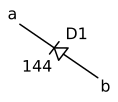

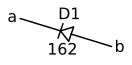

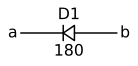

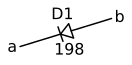

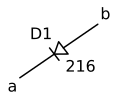

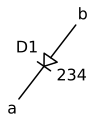

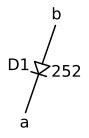

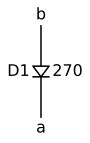

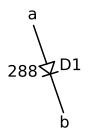

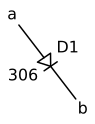

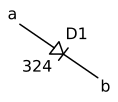

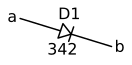

In [21]:
# Label offsets/rotations
div = 20
for i in range(div):
    th = (360./div) * i
    d = schem.Drawing()
    R1 = d.add(e.DIODE, theta=th, label='D1' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    d.draw()
    

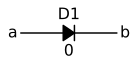

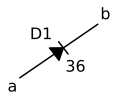

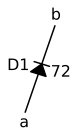

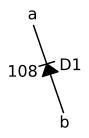

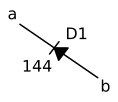

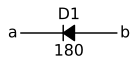

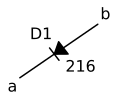

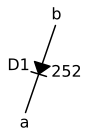

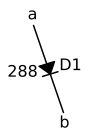

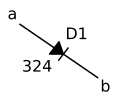

In [22]:
# Label offsets/rotations - with flip
div = 10
for i in range(div):
    th = (360./div) * i
    d = schem.Drawing()
    R1 = d.add(e.DIODE_F, theta=th, flip=True )
    R1.add_label( 'D1', loc='top' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    d.draw()
    

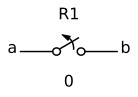

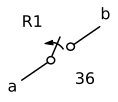

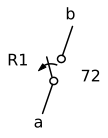

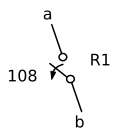

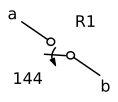

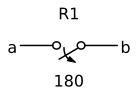

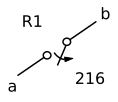

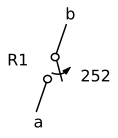

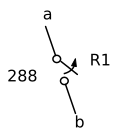

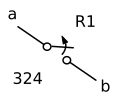

In [23]:
# Label offsets/rotations - with reverse
mpl.rcParams['font.size'] = 8

div = 10
for i in range(div):
    th = (360./div) * i
    d = schem.Drawing()
    R1 = d.add(e.SWITCH_SPST_OPEN, theta=th, reverse=False )
    R1.add_label( 'R1', loc='top' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    d.draw(showframe=False)
    

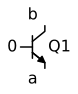

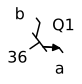

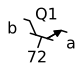

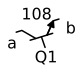

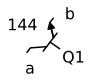

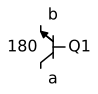

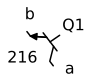

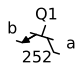

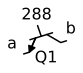

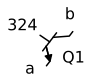

In [24]:
# Label offsets/rotations - BJT
mpl.rcParams['font.size'] = 8

div = 10
for i in range(div):
    th = (360./div) * i
    d = schem.Drawing()
    R1 = d.add(e.BJT_NPN, theta=th )
    R1.add_label( 'Q1', loc='rgt' )
    R1.add_label( '%.0f'%th, loc='lft' )
    R1.add_label( 'a', loc='bot' )
    R1.add_label( 'b', loc='top' )
    d.draw()
    

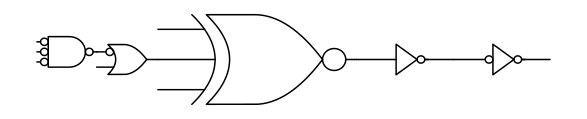

In [25]:
# Logic gates, zoom
d = schem.Drawing()
d.add( l.andgate(3, nand=True, inputnots=[1,2,3]) )
d.add( l.orgate(2, inputnots=[1]), anchor='in1' )
d.add( l.orgate(3, xor=True, nor=True ), zoom=3 )
d.add( l.NOT )
d.add( l.NOTNOT )
d.draw()

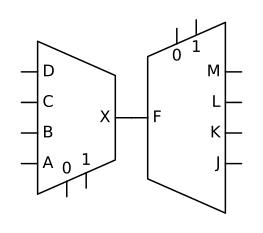

In [26]:
# Multiplexer/demultiplexer
d = schem.Drawing()
M1 = d.add(e.mux(inputs=['A','B','C','D'], outputs=['X'], ctrls=['0','1']))
M2 = d.add(e.mux(inputs=['F'], outputs=['J','K','L','M'], topctrls=['0','1'], demux=True), xy=M1.X, anchor='F')
d.draw()

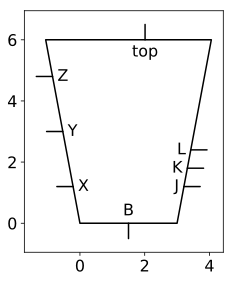

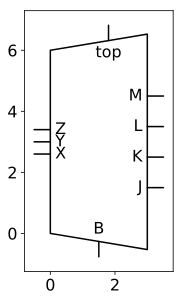

In [27]:
# Test automatic and manual positioning of blackbox labels, hslant and vslant
d = schem.Drawing()
d.add(e.blackbox(3,6, vslant=10,
                 linputs={'labels':['X','Y','Z']},
                 rinputs={'labels':['J','K','L'], 'loc':[.2,.3,.4]},
                 tinputs={'labels':['top'], 'loc':[.6]},
                 binputs={'labels':['B']}
                 ))
d.draw(showframe=True)

# Spacing argument, doesn't matter how long the edge is
d = schem.Drawing()
d.add(e.blackbox(3,6, hslant=10,
                 linputs={'labels':['X','Y','Z'], 'spacing':.4},
                 rinputs={'labels':['J','K','L','M'], 'spacing':1},
                 tinputs={'labels':['top'], 'loc':[.6]},
                 binputs={'labels':['B']}
                 ))
d.draw(showframe=True)

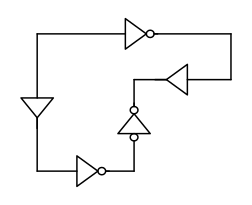

In [28]:
# Test lead extension of single input/output logic gates
d = schem.Drawing()
n = d.add(l.NOT)
d.add(l.NOTNOT, d='up')
d.add(l.BUF, d='right', reverse=True)
d.add(e.LINE, d='up', l=d.unit/2)
d.add(l.NOT, d='left', tox=n.start, reverse=True)
d.add(l.BUF, d='down', toy=n.start)
d.draw()

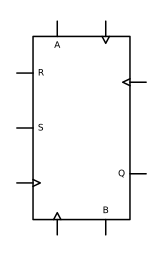

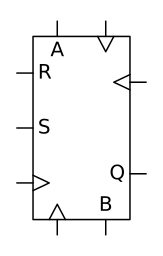

In [29]:
# Draw black boxes with CLK inputs on all sides. Should scale with lblsize.
d = schem.Drawing()
bb = e.blackbox(d.unit, d.unit*2, linputs={'labels':['>', 'S', 'R']},
                rinputs={'labels':['Q', '>']},
                tinputs={'labels':['A', '>']},
                binputs={'labels':['>', 'B']},
                lblsize=9
               )
d.add(bb)
d.draw()

d = schem.Drawing()
bb = e.blackbox(d.unit, d.unit*2, linputs={'labels':['>', 'S', 'R']},
                rinputs={'labels':['Q', '>']},
                tinputs={'labels':['A', '>']},
                binputs={'labels':['>', 'B']},
                lblsize=20
               )
d.add(bb)
d.draw()

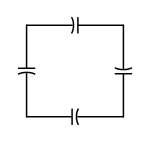

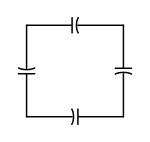

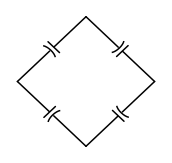

In [30]:
# Check arc drawing that broke with matplotlib 2.2
d = schem.Drawing()
d.add(e.CAP2)
d.add(e.CAP2, d='up')
d.add(e.CAP2, d='left')
d.add(e.CAP2, d='down')
d.draw()

d = schem.Drawing()
d.add(e.CAP2, reverse=True)
d.add(e.CAP2, d='up', reverse=True)
d.add(e.CAP2, d='left', reverse=True)
d.add(e.CAP2, d='down', reverse=True)
d.draw()

d = schem.Drawing()
d.add(e.CAP2, theta=45)
d.add(e.CAP2, theta=135)
d.add(e.CAP2, theta=225)
d.add(e.CAP2, theta=-45)
d.draw()

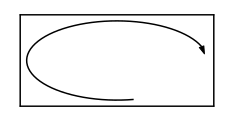

In [31]:
# Make sure arrow head is in correct place
d = schem.Drawing()
L1 = d.add(e.LINE, l=d.unit*2)
L2 = d.add(e.LINE, d='down')
L3 = d.add( e.LINE, d='left', tox=L1.start)
L4 = d.add( e.LINE, d='up' )
d.loopI([L1, L2, L3, L4], d='cw', theta1=10, theta2=292 )
d.draw()

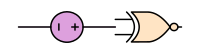

In [39]:
# Fill on paths (like the gate) and shapes (like the source)
d = schem.Drawing()
d.add(e.SOURCE_V, fill='plum', d='right')
d.add(l.XNOR2, fill='bisque')
d.draw()